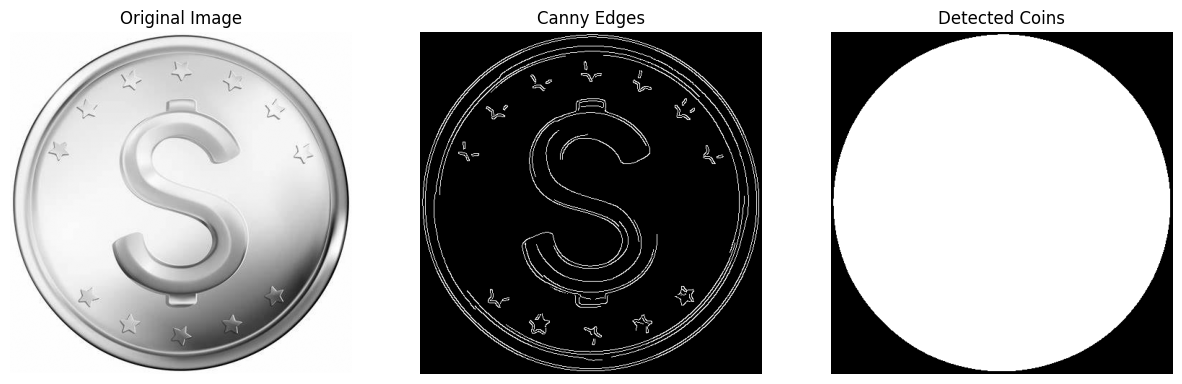

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_coins(image_path):
    """Detect and segment coins in an image using Canny edge detection and contour detection."""

    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found. Check the path.")

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours of the detected edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to highlight the detected coins
    coin_mask = np.zeros_like(image, dtype=np.uint8)
    cv2.drawContours(coin_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Canny Edges")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(coin_mask, cmap="gray")
    plt.title("Detected Coins")
    plt.axis("off")

    plt.show()

    return coin_mask

# Example usage:
detect_coins(r"D:\OIP.jpg")
